In [2]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, Subset
import torch

In [3]:

#1 Feature
"""


def load_data(data, window_size):
    splits = len(data)//window_size
    data = data[:splits*window_size]
    data = data.reshape(-1,window_size)
    #print(np.shape(data))
    return data

def del_nan_element(data_with_nan):
    nan_val = np.isnan(data_with_nan)
    return data_with_nan[nan_val==False]

def concatenate_data_from_BSD_state(folders, data_path, features_of_interest, window_size):
    x_data_concatenated = None
    y_data_concatenated = None
    
    first = True
    for BSD_path in folders.keys(): #folder path
        for file_path in folders[BSD_path]: #file path 
            
            path_BSD_file = os.path.join(data_path, BSD_path, file_path) # concatenate the folder and file path
            
            #in first iteration get a list if all features
            if first == True:
                features = get_features(path_BSD_file)
            
            #load data from files in shape [window_number, 1, window_size]
            data_BSD_file = np.genfromtxt(path_BSD_file, dtype = np.dtype('d'), delimiter=',')[1:,:] #write csv in numpy
            data_BSD_file = data_BSD_file[:,features.index(features_of_interest)]
            data_BSD_file = np.nan_to_num(data_BSD_file)
            #data_BSD_file = del_nan_element(data_BSD_file)
            data_BSD_file = load_data(data_BSD_file, window_size)
            data_BSD_file = np.expand_dims(data_BSD_file, axis = 1)
            
            #rewrite labels as BSD_condition_1 = 0, BSD_condition_2 = 1, BSD_condition_3 = 2, BSD_condition_P1 = 3
            label = BSD_path[-2]
            if label == "P":
                label = int(3)
            else:
                label =int(int(label)-1)
            
            #concatenate the data from each file in one numpy array
            if  first == True:
                x_data_concatenated = np.copy(data_BSD_file)
                y_data_concatenated = np.copy(np.asarray([label]*np.shape(data_BSD_file)[0]))
                first = False
            else:
                x_data_concatenated = np.concatenate((x_data_concatenated, data_BSD_file), axis=0)
                y_data_concatenated = np.concatenate((y_data_concatenated,np.asarray([label]*np.shape(data_BSD_file)[0])), axis=0)
            print(np.shape(x_data_concatenated), np.shape(y_data_concatenated))
    
    #generate torch array
    n_samples = np.shape(x_data_concatenated)[0]
    x_data = torch.from_numpy(x_data_concatenated)
    y_data = torch.from_numpy(y_data_concatenated)
    
    return n_samples, x_data, y_data
"""




"""


class TimeSeriesData_Single_Feature(Dataset):
    def __init__(self):
        window_size = 1024
        feature = 'D:y_bottom'
        
        data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "data")
        training_folders = {}
        testing_folders = {}
        for element in os.listdir(data_path):
            if "BSD_31" in element or "BSD_21"  in element or "BSD_11" in element  or "BSD_P1" in element: 
                training_folders[element]  = os.listdir(os.path.join(data_path,element))
            elif "csv" in element:
                pass
            else:
                testing_folders[element] = os.listdir(os.path.join(data_path,element))
                


        #data_BSD11_collected = np.empty((0,1, window_size))
        #data_BSD21_collected = np.empty((0,1, window_size))
        #data_BSD31_collected = np.empty((0,1, window_size))
        
        
        data_BSD11_collected = None
        data_BSD21_collected = None
        data_BSD31_collected = None

        for i in range(len(training_folders['NR03_20200424_PGS_31_BSD_11'])):                
            
            path_BSD11 = os.path.join(data_path, 'NR03_20200424_PGS_31_BSD_11', training_folders['NR03_20200424_PGS_31_BSD_11'][i])
            path_BSD21 = os.path.join(data_path, 'NR02_20200423_PGS_31_BSD_21', training_folders['NR02_20200423_PGS_31_BSD_21'][i])
            path_BSD31 = os.path.join(data_path, 'NR01_20200317_PGS_31_BSD_31', training_folders['NR01_20200317_PGS_31_BSD_31'][i])

            if i == 0:
                with open(path_BSD11, 'r') as file:
                    csvreader = csv.reader(file)
                    features = next(csvreader)
            
            data_BSD11 = np.genfromtxt(path_BSD11, dtype = np.dtype('d'), delimiter=',')[1:,:] #write csv in numpy
            data_BSD21 = np.genfromtxt(path_BSD21, dtype = np.dtype('d'), delimiter=',')[1:,:] #write csv in numpy
            data_BSD31 = np.genfromtxt(path_BSD31, dtype = np.dtype('d'), delimiter=',')[1:,:] #write csv in numpy
            

            data_BSD11_loaded = load_data(del_nan_element(data_BSD11[:,features.index(feature)]), window_size)
            data_BSD11_loaded = np.expand_dims(data_BSD11_loaded, axis = 1)
            if i == 0:
                data_BSD11_collected = np.copy(data_BSD11_loaded)
            else:
                data_BSD11_collected = np.concatenate((data_BSD11_collected, data_BSD11_loaded), axis=0)
                

            data_BSD21_loaded = load_data(del_nan_element(data_BSD21[:,features.index(feature)]), window_size)
            data_BSD21_loaded = np.expand_dims(data_BSD21_loaded, axis = 1)
            if i == 0:
                data_BSD21_collected = np.copy(data_BSD21_loaded)
            else:
                data_BSD21_collected = np.concatenate((data_BSD21_collected, data_BSD21_loaded), axis=0)
            
            
            data_BSD31_loaded = load_data(del_nan_element(data_BSD31[:,features.index(feature)]), window_size)
            data_BSD31_loaded = np.expand_dims(data_BSD31_loaded, axis = 1)
            if i == 0:
                data_BSD31_collected = np.copy(data_BSD31_loaded)
            else:
                data_BSD31_collected = np.concatenate((data_BSD31_collected, data_BSD31_loaded), axis=0)
            
            
            print(f"number of loaded train files: {i}/ {len(training_folders['NR03_20200424_PGS_31_BSD_11'])-1}")
        
        y_BSD11 = np.asarray([0]*np.shape(data_BSD11_collected)[0])
        y_BSD21 = np.asarray([1]*np.shape(data_BSD21_collected)[0])
        y_BSD31 = np.asarray([2]*np.shape(data_BSD31_collected)[0])
                  
                  
        data_x = np.concatenate((data_BSD11_collected, data_BSD21_collected, data_BSD31_collected), axis=0)
        data_y = np.concatenate((y_BSD11, y_BSD21, y_BSD31), axis=0)
        
        self.x_data = torch.from_numpy(data_x)
        self.y_data = torch.from_numpy(data_y)
        self.n_samples = np.shape(data_x)[0]
        
                  
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples
"""

'\n\n\ndef load_data(data, window_size):\n    splits = len(data)//window_size\n    data = data[:splits*window_size]\n    data = data.reshape(-1,window_size)\n    #print(np.shape(data))\n    return data\n\ndef del_nan_element(data_with_nan):\n    nan_val = np.isnan(data_with_nan)\n    return data_with_nan[nan_val==False]\n\ndef concatenate_data_from_BSD_state(folders, data_path, features_of_interest, window_size):\n    x_data_concatenated = None\n    y_data_concatenated = None\n    \n    first = True\n    for BSD_path in folders.keys(): #folder path\n        for file_path in folders[BSD_path]: #file path \n            \n            path_BSD_file = os.path.join(data_path, BSD_path, file_path) # concatenate the folder and file path\n            \n            #in first iteration get a list if all features\n            if first == True:\n                features = get_features(path_BSD_file)\n            \n            #load data from files in shape [window_number, 1, window_size]\n         

In [4]:
def load_data(data, window_size):
    """
    Split data in windows of equal size
    
    INPUT:
    @data: data numpy array of shape [elements per file, features]
    @window: number of elements per window
    
    OUTPUT
    @data: data numpy array of shape [number_of_windows, elements per window, features]
    """
    splits = np.shape(data)[0]//window_size # number of splits
    data = data[:splits*window_size] #cut off end of array such that array can be split equaly
    data = data.reshape((splits,-1,np.shape(data)[1])) #split array in windows
    return data



def load_data(data, window_size, overlap_size):
    """
    Split data in windows of equal size
    
    INPUT:
    @data: data numpy array of shape [elements per file, features]
    @window: number of elements per window
    
    OUTPUT
    @data: data numpy array of shape [number_of_windows, elements per window, features]
    """
    num_windows = (data.shape[0] - window_size) // (window_size - overlap_size) + 1
    overhang = data.shape[0] - (num_windows*window_size - (num_windows-1)*overlap_size)

    return data






In [5]:
def del_nan_element(data_with_nan):
    """
    Delete all elements in the data which have any nan valued feature
    
    INPUT:
    @data_with_nan: data numpy array containing nan_values
    
    OUTPUT
    @data_with_nan: data numpy array inlcuding just elements per window which do have no nan_vaues in any feature
    """
    nan_val = np.isnan(data_with_nan) #mask for all nan_elements as 2d array [elements_per_window, features]
    nan_val = np.any(nan_val,axis = 1) #mask for all nan_rows as 1d array [elements_per_window]
    return data_with_nan[nan_val==False]

In [166]:
def create_folder_dictionary(list_of_train_BSD_states, list_of_test_BSD_states, data_path):
    """
    Create a dictionaty for testing and training containing folder names as keys and files as values
    
    INPUT:
    @list_of_train_BSD_states: list containing the training BSD states as string
    @list_of_test_BSD_states: list containing the testing BSD states as string
    @data_path: data directory containing folders for each BSD state
    
    OUTPUT
    @training_folders: dictionary folders and keys for training
    @testing_folders: dictionary folders and keys for testing
    """
    
    data_path = data_path
    training_folders = {}
    testing_folders = {}
    
    #Sorting the individual folders by findinding the BSD_states in the folder names
    for data_path_element in os.listdir(data_path):
        if any(element in data_path_element for element in list_of_train_BSD_states): 
            training_folders[data_path_element]  = os.listdir(os.path.join(data_path,data_path_element))
        elif any(element in data_path_element for element in list_of_test_BSD_states): 
            testing_folders[data_path_element] = os.listdir(os.path.join(data_path,data_path_element))
    return training_folders, testing_folders

In [167]:
def get_features(path):
    """
    Creates a list of all feature names
    INPUT:
    @path: path to any BSD file since the features are the same for all files
    
    OUTPUT
    @features: list of features:
    ['C:s_ist/X', 'C:s_soll/X', 'C:s_diff/X', 'C:v_(n_ist)/X', 'C:v_(n_soll)/X', 'C:P_mech./X', 'C:Pos._Diff./X',
    'C:I_ist/X', 'C:I_soll/X', 'C:x_bottom', 'C:y_bottom', 'C:z_bottom', 'C:x_nut', 'C:y_nut', 'C:z_nut',
    'C:x_top', 'C:y_top', 'C:z_top', 'D:s_ist/X', 'D:s_soll/X', 'D:s_diff/X', 'D:v_(n_ist)/X', 'D:v_(n_soll)/X',
    'D:P_mech./X', 'D:Pos._Diff./X', 'D:I_ist/X', 'D:I_soll/X', 'D:x_bottom', 'D:y_bottom', 'D:z_bottom',
    'D:x_nut', 'D:y_nut', 'D:z_nut', 'D:x_top', 'D:y_top', 'D:z_top', 'S:x_bottom', 'S:y_bottom', 'S:z_bottom',
    'S:x_nut', 'S:y_nut', 'S:z_nut', 'S:x_top', 'S:y_top', 'S:z_top', 'S:Nominal_rotational_speed[rad/s]',
    'S:Actual_rotational_speed[µm/s]', 'S:Actual_position_of_the_position_encoder(dy/dt)[µm/s]',
    'S:Actual_position_of_the_motor_encoder(dy/dt)[µm/s]']
    """
    
    with open(path, 'r') as file:
        csvreader = csv.reader(file)
        features = next(csvreader)
    return features

In [185]:
def concatenate_data_from_BSD_state(folders, data_path, features_of_interest, window_size):
    """
    Concatenates all the windowed data from each file to one big torch array
    INPUT:
    @folders: dictionary containing folders (as keys) and files (as values) to downloaded
    @data_path: data directory containing folders for each BSD state
    @features_of_interest: list of features which should be included for training
    @window_size: number of elements per widow
    
    OUTPUT:
    @n_samples: number of total elements from all included files
    @x_data: torch array containing all the data elements 
    @y_data: torch array containing the labels for all elements
    """
    
    
    # arrays to collect data and label
    x_data_concatenated = None
    y_data_concatenated = None
    
    
    iterator = 0
    first = True
    
    
    for BSD_path in folders.keys(): #folder path
        for file_path in folders[BSD_path]: #file path 
            path_BSD_file = os.path.join(data_path, BSD_path, file_path) # concatenate the data_path, folder and file path
            #in first iteration get a list if all features
            if first == True:
                features = get_features(path_BSD_file)
            
            data_BSD_file = np.genfromtxt(path_BSD_file, dtype = np.dtype('d'), delimiter=',')[1:,:] #write csv in numpy
            feature_index_list = np.where(np.isin(features, features_of_interest)) #get index for all features of interest
            data_BSD_file = data_BSD_file[:,feature_index_list] #slice numpy array such that just features of interest are included
            data_BSD_file = np.squeeze(data_BSD_file, axis = 1) # one unnecessary extra dimension was created while slicing
            data_BSD_file = del_nan_element(data_BSD_file) #delete all elements with any nan feature
            data_BSD_file = load_data(data_BSD_file, window_size) #window the data
            data_BSD_file = np.swapaxes(data_BSD_file,1,2) #swap axes for CNN
            
            
            #rewrite labels as BSD_condition_1 = 0, BSD_condition_2 = 1, BSD_condition_3 = 2, BSD_condition_P1 = 3
            label = BSD_path[-2] #take the first number of the BSD state for class label
            if label == "P":
                label = int(3)
            else:
                label =int(int(label)-1)
            
            
            
            #concatenate the data from each file in one numpy array
            if  first == True: #overwrite variable
                x_data_concatenated = np.copy(data_BSD_file)
                y_data_concatenated = np.copy(np.asarray([label]*np.shape(data_BSD_file)[0]))
                first = False
            else: #concatenate data numpy arrays
                x_data_concatenated = np.concatenate((x_data_concatenated, data_BSD_file), axis=0)
                y_data_concatenated = np.concatenate((y_data_concatenated,np.asarray([label]*np.shape(data_BSD_file)[0])), axis=0)
            
            
            iterator +=1
            print(f"{iterator}/{len(folders.keys())*len(folders[list(folders.keys())[0]])} folders downloaded")
            print(f"downloaded folder: {BSD_path}/{file_path}")
            print(f"Shape of collected datafram: X_shape: {np.shape(x_data_concatenated)}, Y_shape: {np.shape(y_data_concatenated)}")
    
    #generate torch array
    n_samples = np.shape(x_data_concatenated)[0]
    x_data = torch.from_numpy(x_data_concatenated)
    y_data = torch.from_numpy(y_data_concatenated)
    
    return n_samples, x_data, y_data

In [186]:
class TimeSeriesData(Dataset):
    """
    Class for creating dataset using PyTorch data primitive Dataset. An instance of this class can be used in the 
    PyTorch data primitive Dataloader
    
    The following patameters can be adjusted:
    @windwo_size: Size of window which is used as Input in CNN
    @feature_of_interest: List of all features which should be used in the CNN
    @list_of_train_BSD_states: List of BSD states which should be used for training. Be careful at least 4 BSD
    states representing the 4 different classes should be included for the training
    @list_of_test_BSD_states: List of BSD states which should be used for testing
    """
    
    
    def __init__(self):
        window_size = 1024
        features_of_interest = ['C:s_ist/X', 'C:s_soll/X', 'C:s_diff/X', 'C:v_(n_ist)/X', 'C:v_(n_soll)/X', 'C:P_mech./X', 'C:Pos._Diff./X',
    'C:I_ist/X', 'C:I_soll/X', 'C:x_bottom', 'C:y_bottom', 'C:z_bottom', 'C:x_nut', 'C:y_nut', 'C:z_nut',
    'C:x_top', 'C:y_top', 'C:z_top', 'D:s_ist/X', 'D:s_soll/X', 'D:s_diff/X', 'D:v_(n_ist)/X', 'D:v_(n_soll)/X',
    'D:P_mech./X', 'D:Pos._Diff./X', 'D:I_ist/X', 'D:I_soll/X', 'D:x_bottom', 'D:y_bottom', 'D:z_bottom',
    'D:x_nut', 'D:y_nut', 'D:z_nut', 'D:x_top', 'D:y_top', 'D:z_top', 'S:x_bottom', 'S:y_bottom', 'S:z_bottom',
    'S:x_nut', 'S:y_nut', 'S:z_nut', 'S:x_top', 'S:y_top', 'S:z_top', 'S:Nominal_rotational_speed[rad/s]',
    'S:Actual_rotational_speed[µm/s]', 'S:Actual_position_of_the_position_encoder(dy/dt)[µm/s]',
    'S:Actual_position_of_the_motor_encoder(dy/dt)[µm/s]']
        number_of_files_per_BDS_state = 10
        list_of_train_BSD_states = ["BSD_31", "BSD_21", "BSD_11", "BSD_P1"]
        list_of_test_BSD_states = ["BSD_32", "BSD_22", "BSD_12", "BSD_P2"]
        data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "data")
        
        training_folders, testing_folders = create_folder_dictionary(list_of_train_BSD_states, list_of_test_BSD_states, data_path)
        
        self.n_samples, self.x_data, self.y_data = concatenate_data_from_BSD_state(training_folders, data_path, features_of_interest, window_size)
        
                  
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples



    

In [187]:
dataset = TimeSeriesData()


/Users/fabiankolb/Documents/Universität/TUM_Master/Masterarbeit/CODE/data/NR03_20200424_PGS_31_BSD_11/063_2020_04_24.csv
[[[-7.12132900e+02 -7.12132900e+02 -7.12132900e+02 ... -7.00613000e+02
   -7.00613000e+02 -7.00613000e+02]
  [-7.00001000e+02 -7.00001000e+02 -7.00001000e+02 ... -7.04808600e+02
   -7.04808600e+02 -7.04808600e+02]
  [ 4.92090000e+00  4.92090000e+00  4.92090000e+00 ...  6.13100000e-01
    6.13100000e-01  6.13100000e-01]
  ...
  [ 2.18460000e+00  2.49670000e+00  2.74640000e+00 ...  4.51281000e+01
    4.11958000e+01  3.54533000e+01]
  [ 2.00195300e+02  2.00195300e+02  2.34374900e+02 ...  7.44140420e+03
    7.24609170e+03  6.65038880e+03]
  [ 3.33786000e+02  3.33786000e+02  3.89099100e+02 ...  7.16018680e+03
    6.80541990e+03  6.16645810e+03]]

 [[-7.00613000e+02 -7.00613000e+02 -7.00613000e+02 ... -7.01703700e+02
   -7.01703700e+02 -7.01703700e+02]
  [-7.04808600e+02 -7.04808600e+02 -7.04808600e+02 ... -7.32027500e+02
   -7.32027500e+02 -7.32027500e+02]
  [ 6.13100000e

[[[-7.12132700e+02 -7.12132700e+02 -7.12132700e+02 ... -7.00613100e+02
   -7.00613100e+02 -7.00613100e+02]
  [-7.00001000e+02 -7.00001000e+02 -7.00001000e+02 ... -7.04808600e+02
   -7.04808600e+02 -7.04808600e+02]
  [ 4.92100000e+00  4.92100000e+00  4.92100000e+00 ...  6.12900000e-01
    6.12900000e-01  6.12900000e-01]
  ...
  [ 1.81010000e+00  2.24700000e+00  2.55910000e+00 ...  4.50657000e+01
    4.11958000e+01  3.57030000e+01]
  [ 1.70898400e+02  1.70898400e+02  2.05078100e+02 ...  7.39745890e+03
    7.24120890e+03  6.66992000e+03]
  [ 2.97546400e+02  2.97546400e+02  3.50952100e+02 ...  7.14111330e+03
    6.78253170e+03  6.14547730e+03]]

 [[-7.00613100e+02 -7.00613100e+02 -7.00613100e+02 ... -7.01703900e+02
   -7.01703900e+02 -7.01703900e+02]
  [-7.04808600e+02 -7.04808600e+02 -7.04808600e+02 ... -7.32027500e+02
   -7.32027500e+02 -7.32027500e+02]
  [ 6.12900000e-01  6.12900000e-01  6.12900000e-01 ... -1.11500000e+00
   -1.11500000e+00 -1.11500000e+00]
  ...
  [ 2.81504000e+01  1.9

[[[-7.12132900e+02 -7.12132900e+02 -7.12132900e+02 ... -7.00613000e+02
   -7.00613000e+02 -7.00613000e+02]
  [-7.00001000e+02 -7.00001000e+02 -7.00001000e+02 ... -7.04808600e+02
   -7.04808600e+02 -7.04808600e+02]
  [ 4.92110000e+00  4.92110000e+00  4.92110000e+00 ...  6.13200000e-01
    6.13200000e-01  6.13200000e-01]
  ...
  [ 2.05980000e+00  2.37190000e+00  2.74640000e+00 ...  4.50033000e+01
    4.13830000e+01  3.57654000e+01]
  [ 1.85546800e+02  1.85546800e+02  2.24609300e+02 ...  7.42675570e+03
    7.27538860e+03  6.67968560e+03]
  [ 3.26156600e+02  3.26156600e+02  3.75747700e+02 ...  7.13920590e+03
    6.78062440e+03  6.14929200e+03]]

 [[-7.00613000e+02 -7.00613000e+02 -7.00613000e+02 ... -7.01703700e+02
   -7.01703700e+02 -7.01703700e+02]
  [-7.04808600e+02 -7.04808600e+02 -7.04808600e+02 ... -7.32027500e+02
   -7.32027500e+02 -7.32027500e+02]
  [ 6.13200000e-01  6.13200000e-01  6.13200000e-01 ... -1.11510000e+00
   -1.11510000e+00 -1.11510000e+00]
  ...
  [ 2.80256000e+01  1.9

[[[-7.12132900e+02 -7.12132900e+02 -7.12132900e+02 ... -7.00613200e+02
   -7.00613200e+02 -7.00613200e+02]
  [-7.00001000e+02 -7.00001000e+02 -7.00001000e+02 ... -7.04808600e+02
   -7.04808600e+02 -7.04808600e+02]
  [ 4.92110000e+00  4.92110000e+00  4.92110000e+00 ...  6.13300000e-01
    6.13300000e-01  6.13300000e-01]
  ...
  [ 2.12220000e+00  2.43430000e+00  2.68400000e+00 ...  4.53778000e+01
    4.11958000e+01  3.54533000e+01]
  [ 1.85546800e+02  1.85546800e+02  2.24609300e+02 ...  7.39745890e+03
    7.20702920e+03  6.61620910e+03]
  [ 3.18527200e+02  3.18527200e+02  3.77655000e+02 ...  7.14492800e+03
    6.79016110e+03  6.14166260e+03]]

 [[-7.00613200e+02 -7.00613200e+02 -7.00613200e+02 ... -7.01703800e+02
   -7.01703800e+02 -7.01703800e+02]
  [-7.04808600e+02 -7.04808600e+02 -7.04808600e+02 ... -7.32027500e+02
   -7.32027500e+02 -7.32027500e+02]
  [ 6.13300000e-01  6.13300000e-01  6.13300000e-01 ... -1.11520000e+00
   -1.11520000e+00 -1.11520000e+00]
  ...
  [ 2.80256000e+01  1.9

[[[-7.12132600e+02 -7.12132600e+02 -7.12132600e+02 ... -7.00613400e+02
   -7.00613400e+02 -7.00613400e+02]
  [-7.00001000e+02 -7.00001000e+02 -7.00001000e+02 ... -7.04808600e+02
   -7.04808600e+02 -7.04808600e+02]
  [ 4.92100000e+00  4.92100000e+00  4.92100000e+00 ...  6.13400000e-01
    6.13400000e-01  6.13400000e-01]
  ...
  [ 2.12220000e+00  2.55910000e+00  2.80880000e+00 ...  4.53778000e+01
    4.15703000e+01  3.57654000e+01]
  [ 1.95312400e+02  1.95312400e+02  2.44140600e+02 ...  7.50976350e+03
    7.29003700e+03  6.69921690e+03]
  [ 3.37600700e+02  3.37600700e+02  3.91006500e+02 ...  7.19261170e+03
    6.83212280e+03  6.19697570e+03]]

 [[-7.00613400e+02 -7.00613400e+02 -7.00613400e+02 ... -7.01703800e+02
   -7.01703800e+02 -7.01703800e+02]
  [-7.04808600e+02 -7.04808600e+02 -7.04808600e+02 ... -7.32027500e+02
   -7.32027500e+02 -7.32027500e+02]
  [ 6.13400000e-01  6.13400000e-01  6.13400000e-01 ... -1.11570000e+00
   -1.11570000e+00 -1.11570000e+00]
  ...
  [ 2.82753000e+01  1.9

[[[-7.1216810e+02 -7.1216810e+02 -7.1216810e+02 ... -7.0061590e+02
   -7.0061590e+02 -7.0061590e+02]
  [-7.0000060e+02 -7.0000060e+02 -7.0000060e+02 ... -7.0480820e+02
   -7.0480820e+02 -7.0480820e+02]
  [ 4.9438000e+00  4.9438000e+00  4.9438000e+00 ...  6.1420000e-01
    6.1420000e-01  6.1420000e-01]
  ...
  [ 2.1846000e+00  2.5591000e+00  3.0585000e+00 ...  4.6501300e+01
    4.2569000e+01  3.6826500e+01]
  [ 2.3925770e+02  2.3925770e+02  2.7832020e+02 ...  7.9882790e+03
    7.6318338e+03  6.9628887e+03]
  [ 3.4713750e+02  3.4713750e+02  4.1008000e+02 ...  7.3261261e+03
    6.9980621e+03  6.3610077e+03]]

 [[-7.0061590e+02 -7.0061590e+02 -7.0061590e+02 ... -7.0170500e+02
   -7.0170500e+02 -7.0170500e+02]
  [-7.0480820e+02 -7.0480820e+02 -7.0480820e+02 ... -7.3217490e+02
   -7.3217490e+02 -7.3217490e+02]
  [ 6.1420000e-01  6.1420000e-01  6.1420000e-01 ... -1.1146000e+00
   -1.1146000e+00 -1.1146000e+00]
  ...
  [ 2.9211500e+01  2.0098500e+01  1.0174100e+01 ... -3.8075000e+00
   -1.4980

[[[-7.1216810e+02 -7.1216810e+02 -7.1216810e+02 ... -7.0061590e+02
   -7.0061590e+02 -7.0061590e+02]
  [-7.0000060e+02 -7.0000060e+02 -7.0000060e+02 ... -7.0480820e+02
   -7.0480820e+02 -7.0480820e+02]
  [ 4.9438000e+00  4.9438000e+00  4.9438000e+00 ...  6.1460000e-01
    6.1460000e-01  6.1460000e-01]
  ...
  [ 2.1846000e+00  2.4967000e+00  2.8712000e+00 ...  4.6938200e+01
    4.3318000e+01  3.7700400e+01]
  [ 2.3925770e+02  2.3925770e+02  2.6855460e+02 ...  8.1640602e+03
    7.8173806e+03  7.1533183e+03]
  [ 3.3950810e+02  3.3950810e+02  3.9863590e+02 ...  7.3928833e+03
    7.0705414e+03  6.4525604e+03]]

 [[-7.0061590e+02 -7.0061590e+02 -7.0061590e+02 ... -7.0170440e+02
   -7.0170440e+02 -7.0170440e+02]
  [-7.0480820e+02 -7.0480820e+02 -7.0480820e+02 ... -7.3217490e+02
   -7.3217490e+02 -7.3217490e+02]
  [ 6.1460000e-01  6.1460000e-01  6.1460000e-01 ... -1.1150000e+00
   -1.1150000e+00 -1.1150000e+00]
  ...
  [ 2.9648500e+01  2.0597900e+01  1.0548600e+01 ... -3.9323000e+00
   -1.5167

[[[-7.1216810e+02 -7.1216810e+02 -7.1216810e+02 ... -7.0061600e+02
   -7.0061600e+02 -7.0061600e+02]
  [-7.0000060e+02 -7.0000060e+02 -7.0000060e+02 ... -7.0480820e+02
   -7.0480820e+02 -7.0480820e+02]
  [ 4.9438000e+00  4.9438000e+00  4.9438000e+00 ...  6.1440000e-01
    6.1440000e-01  6.1440000e-01]
  ...
  [ 2.1846000e+00  2.5591000e+00  2.9961000e+00 ...  4.6501300e+01
    4.3130700e+01  3.7263400e+01]
  [ 2.3437490e+02  2.3437490e+02  2.7832020e+02 ...  8.0126931e+03
    7.6953103e+03  7.0165996e+03]
  [ 3.4713750e+02  3.4713750e+02  4.0626530e+02 ...  7.3528290e+03
    7.0190430e+03  6.3877106e+03]]

 [[-7.0061600e+02 -7.0061600e+02 -7.0061600e+02 ... -7.0170470e+02
   -7.0170470e+02 -7.0170470e+02]
  [-7.0480820e+02 -7.0480820e+02 -7.0480820e+02 ... -7.3217490e+02
   -7.3217490e+02 -7.3217490e+02]
  [ 6.1440000e-01  6.1440000e-01  6.1440000e-01 ... -1.1148000e+00
   -1.1148000e+00 -1.1148000e+00]
  ...
  [ 2.9274000e+01  2.0285800e+01  1.0236500e+01 ... -4.0572000e+00
   -1.5542

[[[-7.1216810e+02 -7.1216810e+02 -7.1216810e+02 ... -7.0061610e+02
   -7.0061610e+02 -7.0061610e+02]
  [-7.0000060e+02 -7.0000060e+02 -7.0000060e+02 ... -7.0480820e+02
   -7.0480820e+02 -7.0480820e+02]
  [ 4.9438000e+00  4.9438000e+00  4.9438000e+00 ...  6.1470000e-01
    6.1470000e-01  6.1470000e-01]
  ...
  [ 2.1846000e+00  2.6215000e+00  2.9961000e+00 ...  4.6563700e+01
    4.3005900e+01  3.7076200e+01]
  [ 2.3925770e+02  2.3925770e+02  2.7832020e+02 ...  8.0419899e+03
    7.7148416e+03  7.0410137e+03]
  [ 3.5285950e+02  3.5285950e+02  4.1198730e+02 ...  7.3528290e+03
    7.0266724e+03  6.3953400e+03]]

 [[-7.0061610e+02 -7.0061610e+02 -7.0061610e+02 ... -7.0170450e+02
   -7.0170450e+02 -7.0170450e+02]
  [-7.0480820e+02 -7.0480820e+02 -7.0480820e+02 ... -7.3217490e+02
   -7.3217490e+02 -7.3217490e+02]
  [ 6.1470000e-01  6.1470000e-01  6.1470000e-01 ... -1.1150000e+00
   -1.1150000e+00 -1.1150000e+00]
  ...
  [ 2.9398800e+01  2.0535500e+01  1.0361400e+01 ... -3.8699000e+00
   -1.5105

[[[-7.12167400e+02 -7.12167400e+02 -7.12167400e+02 ... -7.00615300e+02
   -7.00615300e+02 -7.00615300e+02]
  [-7.00000600e+02 -7.00000600e+02 -7.00000600e+02 ... -7.04808200e+02
   -7.04808200e+02 -7.04808200e+02]
  [ 4.94390000e+00  4.94390000e+00  4.94390000e+00 ...  6.14700000e-01
    6.14700000e-01  6.14700000e-01]
  ...
  [ 1.87250000e+00  2.05980000e+00  2.37190000e+00 ...  4.53778000e+01
    4.13206000e+01  3.52037000e+01]
  [ 1.70898400e+02  1.70898400e+02  2.09960900e+02 ...  7.37304480e+03
    7.11425580e+03  6.50878720e+03]
  [ 2.86102300e+02  2.86102300e+02  3.29971300e+02 ...  7.13920590e+03
    6.77871700e+03  6.11877440e+03]]

 [[-7.00615300e+02 -7.00615300e+02 -7.00615300e+02 ... -7.01704400e+02
   -7.01704400e+02 -7.01704400e+02]
  [-7.04808200e+02 -7.04808200e+02 -7.04808200e+02 ... -7.32174900e+02
   -7.32174900e+02 -7.32174900e+02]
  [ 6.14700000e-01  6.14700000e-01  6.14700000e-01 ... -1.11590000e+00
   -1.11590000e+00 -1.11590000e+00]
  ...
  [ 2.75887000e+01  1.8

[[[-7.12167900e+02 -7.12167900e+02 -7.12167900e+02 ... -7.00615300e+02
   -7.00615300e+02 -7.00615300e+02]
  [-7.00000600e+02 -7.00000600e+02 -7.00000600e+02 ... -7.04808200e+02
   -7.04808200e+02 -7.04808200e+02]
  [ 4.94360000e+00  4.94360000e+00  4.94360000e+00 ...  6.15100000e-01
    6.15100000e-01  6.15100000e-01]
  ...
  [ 2.24700000e+00  2.37190000e+00  2.74640000e+00 ...  4.52529000e+01
    4.10709000e+01  3.52037000e+01]
  [ 2.05078100e+02  2.05078100e+02  2.49023400e+02 ...  7.38281040e+03
    7.14355270e+03  6.57226380e+03]
  [ 3.45230100e+02  3.45230100e+02  3.92913800e+02 ...  7.17926030e+03
    6.78825380e+03  6.12449650e+03]]

 [[-7.00615300e+02 -7.00615300e+02 -7.00615300e+02 ... -7.01704100e+02
   -7.01704100e+02 -7.01704100e+02]
  [-7.04808200e+02 -7.04808200e+02 -7.04808200e+02 ... -7.32174900e+02
   -7.32174900e+02 -7.32174900e+02]
  [ 6.15100000e-01  6.15100000e-01  6.15100000e-01 ... -1.11660000e+00
   -1.11660000e+00 -1.11660000e+00]
  ...
  [ 2.79632000e+01  1.9

[[[-7.12168100e+02 -7.12168100e+02 -7.12168100e+02 ... -7.00615300e+02
   -7.00615300e+02 -7.00615300e+02]
  [-7.00000600e+02 -7.00000600e+02 -7.00000600e+02 ... -7.04808200e+02
   -7.04808200e+02 -7.04808200e+02]
  [ 4.94340000e+00  4.94340000e+00  4.94340000e+00 ...  6.15100000e-01
    6.15100000e-01  6.15100000e-01]
  ...
  [ 1.93500000e+00  2.18460000e+00  2.55910000e+00 ...  4.46912000e+01
    4.05092000e+01  3.46419000e+01]
  [ 1.90429600e+02  1.90429600e+02  2.09960900e+02 ...  7.25097450e+03
    6.99218550e+03  6.40136540e+03]
  [ 2.99453700e+02  2.99453700e+02  3.49044800e+02 ...  7.08580020e+03
    6.71958920e+03  6.05392460e+03]]

 [[-7.00615300e+02 -7.00615300e+02 -7.00615300e+02 ... -7.01704300e+02
   -7.01704300e+02 -7.01704300e+02]
  [-7.04808200e+02 -7.04808200e+02 -7.04808200e+02 ... -7.32174900e+02
   -7.32174900e+02 -7.32174900e+02]
  [ 6.15100000e-01  6.15100000e-01  6.15100000e-01 ... -1.11600000e+00
   -1.11600000e+00 -1.11600000e+00]
  ...
  [ 2.71518000e+01  1.8

[[[-7.12167900e+02 -7.12167900e+02 -7.12167900e+02 ... -7.00615600e+02
   -7.00615600e+02 -7.00615600e+02]
  [-7.00000600e+02 -7.00000600e+02 -7.00000600e+02 ... -7.04808200e+02
   -7.04808200e+02 -7.04808200e+02]
  [ 4.94380000e+00  4.94380000e+00  4.94380000e+00 ...  6.14900000e-01
    6.14900000e-01  6.14900000e-01]
  ...
  [ 1.81010000e+00  2.12220000e+00  2.43430000e+00 ...  4.46288000e+01
    4.08213000e+01  3.50788000e+01]
  [ 1.61132800e+02  1.61132800e+02  2.00195300e+02 ...  7.31445110e+03
    7.06054490e+03  6.44042790e+03]
  [ 2.88009600e+02  2.88009600e+02  3.29971300e+02 ...  7.08580020e+03
    6.71768190e+03  6.06727600e+03]]

 [[-7.00615600e+02 -7.00615600e+02 -7.00615600e+02 ... -7.01704000e+02
   -7.01704000e+02 -7.01704000e+02]
  [-7.04808200e+02 -7.04808200e+02 -7.04808200e+02 ... -7.32174900e+02
   -7.32174900e+02 -7.32174900e+02]
  [ 6.14900000e-01  6.14900000e-01  6.14900000e-01 ... -1.11600000e+00
   -1.11600000e+00 -1.11600000e+00]
  ...
  [ 2.70893000e+01  1.8

KeyboardInterrupt: 

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F


In [50]:
class CNNLSTM(nn.Module):
    def __init__(self, input_size, output_size,hidden_size,num_layers):
        super(CNNLSTM, self).__init__()
        
        """
        formula [(W−K+2P)/S]+1.
        """
        self.conv1 = nn.Conv1d(input_size, 64, kernel_size=2, stride=1)#input: 1024
        self.conv2 = nn.Conv1d(64,32,kernel_size=1, stride = 1, padding=1)#input: [(1025-2+2*0)/1]+1 = 1023
        self.batch1 =nn.BatchNorm1d(32)#input: [(1023-1+2*1)/1]+1 = 1025
        self.conv3 = nn.Conv1d(32,32,kernel_size=1, stride = 1, padding=1) #input:1025
        self.batch2 =nn.BatchNorm1d(32)#input: [(1025-2+0)/1]+1 = 1027
        self.LSTM = nn.LSTM(input_size=1027, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        #self.fc1 = nn.Linear(32*hidden_size, output_size)
        self.fc1 = nn.Linear(32*1027, output_size)

    def forward(self, x):
        x = F.selu(self.conv1(x))
        x = self.conv2(x)
        x = F.selu(self.batch1(x))
        x = self.conv3(x)
        x = F.selu(self.batch2(x))
        #x, h = self.LSTM(x) 
        x = torch.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
        x = self.fc1(x)
        output = x
        
        return output

In [51]:
input_size = 49
output_size = 4
hidden_size = 1000
num_layers = 2

model = CNNLSTM(input_size, output_size,hidden_size, num_layers)
print(model)

CNNLSTM(
  (conv1): Conv1d(49, 64, kernel_size=(2,), stride=(1,))
  (conv2): Conv1d(64, 32, kernel_size=(1,), stride=(1,), padding=(1,))
  (batch1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(32, 32, kernel_size=(1,), stride=(1,), padding=(1,))
  (batch2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LSTM): LSTM(1027, 1000, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=32864, out_features=4, bias=True)
)


In [86]:
# define train/test dimensions
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

#split dataset randomly
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#define batch size for dataloader
batch_size = 4

#dataloader
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)


test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2)


In [144]:
#define training params
num_epochs = 300
learning_rate = 0.008

#define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#collect loss for each batch
loss_list = []

#information for plotting
n_total_steps = len(train_loader)


# Train the model
for epoch in range(num_epochs):
    for i, (window, labels) in enumerate(train_loader):

        # Forward pass
        outputs = model(window.float())
        loss = criterion(outputs, labels)
        loss_list.append(loss)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #plot information during training
        if (i+1) % 20 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/300], Step [20/384], Loss: 176.2216
Epoch [1/300], Step [40/384], Loss: 115.6225
Epoch [1/300], Step [60/384], Loss: 113.7861
Epoch [1/300], Step [80/384], Loss: 6.2788
Epoch [1/300], Step [100/384], Loss: 336.2570
Epoch [1/300], Step [120/384], Loss: 1048.8601
Epoch [1/300], Step [140/384], Loss: 208.6692
Epoch [1/300], Step [160/384], Loss: 358.9186
Epoch [1/300], Step [180/384], Loss: 132.0727
Epoch [1/300], Step [200/384], Loss: 449.2500
Epoch [1/300], Step [220/384], Loss: 185.4740
Epoch [1/300], Step [240/384], Loss: 84.5571
Epoch [1/300], Step [260/384], Loss: 209.4806
Epoch [1/300], Step [280/384], Loss: 389.3882
Epoch [1/300], Step [300/384], Loss: 100.8899
Epoch [1/300], Step [320/384], Loss: 95.0956
Epoch [1/300], Step [340/384], Loss: 352.0946
Epoch [1/300], Step [360/384], Loss: 270.8908
Epoch [1/300], Step [380/384], Loss: 28.8085
Epoch [2/300], Step [20/384], Loss: 201.6741
Epoch [2/300], Step [40/384], Loss: 243.2604
Epoch [2/300], Step [60/384], Loss: 349.5515

Epoch [10/300], Step [200/384], Loss: 276.3358
Epoch [10/300], Step [220/384], Loss: 86.9628
Epoch [10/300], Step [240/384], Loss: 89.7641
Epoch [10/300], Step [260/384], Loss: 373.2453
Epoch [10/300], Step [280/384], Loss: 36.4367
Epoch [10/300], Step [300/384], Loss: 236.5370
Epoch [10/300], Step [320/384], Loss: 175.7839
Epoch [10/300], Step [340/384], Loss: 296.2721
Epoch [10/300], Step [360/384], Loss: 91.3030
Epoch [10/300], Step [380/384], Loss: 53.0387
Epoch [11/300], Step [20/384], Loss: 150.1892
Epoch [11/300], Step [40/384], Loss: 226.7455
Epoch [11/300], Step [60/384], Loss: 0.0000
Epoch [11/300], Step [80/384], Loss: 152.6787
Epoch [11/300], Step [100/384], Loss: 92.1328
Epoch [11/300], Step [120/384], Loss: 56.0465
Epoch [11/300], Step [140/384], Loss: 291.5152
Epoch [11/300], Step [160/384], Loss: 162.8896
Epoch [11/300], Step [180/384], Loss: 372.0794
Epoch [11/300], Step [200/384], Loss: 177.1702
Epoch [11/300], Step [220/384], Loss: 58.3453
Epoch [11/300], Step [240/3

Epoch [19/300], Step [320/384], Loss: 359.3248
Epoch [19/300], Step [340/384], Loss: 248.4505
Epoch [19/300], Step [360/384], Loss: 49.6567
Epoch [19/300], Step [380/384], Loss: 0.0681
Epoch [20/300], Step [20/384], Loss: 150.2954
Epoch [20/300], Step [40/384], Loss: 0.4534
Epoch [20/300], Step [60/384], Loss: 109.6936
Epoch [20/300], Step [80/384], Loss: 185.9288
Epoch [20/300], Step [100/384], Loss: 126.8151
Epoch [20/300], Step [120/384], Loss: 159.6874
Epoch [20/300], Step [140/384], Loss: 5.4599
Epoch [20/300], Step [160/384], Loss: 46.2326
Epoch [20/300], Step [180/384], Loss: 160.0697
Epoch [20/300], Step [200/384], Loss: 50.2716
Epoch [20/300], Step [220/384], Loss: 446.4021
Epoch [20/300], Step [240/384], Loss: 0.0000
Epoch [20/300], Step [260/384], Loss: 0.0000
Epoch [20/300], Step [280/384], Loss: 93.6576
Epoch [20/300], Step [300/384], Loss: 250.4300
Epoch [20/300], Step [320/384], Loss: 128.5643
Epoch [20/300], Step [340/384], Loss: 148.0122
Epoch [20/300], Step [360/384],

Epoch [29/300], Step [80/384], Loss: 257.8250
Epoch [29/300], Step [100/384], Loss: 161.9098
Epoch [29/300], Step [120/384], Loss: 12.4032
Epoch [29/300], Step [140/384], Loss: 231.7072
Epoch [29/300], Step [160/384], Loss: 6.7877
Epoch [29/300], Step [180/384], Loss: 320.6642
Epoch [29/300], Step [200/384], Loss: 67.3881
Epoch [29/300], Step [220/384], Loss: 67.6325
Epoch [29/300], Step [240/384], Loss: 196.2690
Epoch [29/300], Step [260/384], Loss: 144.8867
Epoch [29/300], Step [280/384], Loss: 0.0000
Epoch [29/300], Step [300/384], Loss: 0.0000
Epoch [29/300], Step [320/384], Loss: 106.7221
Epoch [29/300], Step [340/384], Loss: 0.0000
Epoch [29/300], Step [360/384], Loss: 143.5776
Epoch [29/300], Step [380/384], Loss: 307.0196
Epoch [30/300], Step [20/384], Loss: 18.9656
Epoch [30/300], Step [40/384], Loss: 14.8899
Epoch [30/300], Step [60/384], Loss: 88.0900
Epoch [30/300], Step [80/384], Loss: 65.4928
Epoch [30/300], Step [100/384], Loss: 91.9470
Epoch [30/300], Step [120/384], Lo

Epoch [38/300], Step [220/384], Loss: 125.0580
Epoch [38/300], Step [240/384], Loss: 0.0000
Epoch [38/300], Step [260/384], Loss: 102.9547
Epoch [38/300], Step [280/384], Loss: 0.0000
Epoch [38/300], Step [300/384], Loss: 11.6156
Epoch [38/300], Step [320/384], Loss: 107.9752
Epoch [38/300], Step [340/384], Loss: 0.0000
Epoch [38/300], Step [360/384], Loss: 628.1061
Epoch [38/300], Step [380/384], Loss: 0.0001
Epoch [39/300], Step [20/384], Loss: 0.0000
Epoch [39/300], Step [40/384], Loss: 98.0942
Epoch [39/300], Step [60/384], Loss: 0.0000
Epoch [39/300], Step [80/384], Loss: 362.2211
Epoch [39/300], Step [100/384], Loss: 109.0098
Epoch [39/300], Step [120/384], Loss: 24.3264
Epoch [39/300], Step [140/384], Loss: 0.0000
Epoch [39/300], Step [160/384], Loss: 0.0000
Epoch [39/300], Step [180/384], Loss: 58.9440
Epoch [39/300], Step [200/384], Loss: 0.0000
Epoch [39/300], Step [220/384], Loss: 8.4491
Epoch [39/300], Step [240/384], Loss: 161.5174
Epoch [39/300], Step [260/384], Loss: 166

Epoch [47/300], Step [380/384], Loss: 55.6347
Epoch [48/300], Step [20/384], Loss: 30.1338
Epoch [48/300], Step [40/384], Loss: 112.0056
Epoch [48/300], Step [60/384], Loss: 22.2891
Epoch [48/300], Step [80/384], Loss: 34.7957
Epoch [48/300], Step [100/384], Loss: 37.1973
Epoch [48/300], Step [120/384], Loss: 50.7145
Epoch [48/300], Step [140/384], Loss: 75.5331
Epoch [48/300], Step [160/384], Loss: 29.3721
Epoch [48/300], Step [180/384], Loss: 104.0832
Epoch [48/300], Step [200/384], Loss: 450.2816
Epoch [48/300], Step [220/384], Loss: 95.4420
Epoch [48/300], Step [240/384], Loss: 40.4856
Epoch [48/300], Step [260/384], Loss: 124.1520
Epoch [48/300], Step [280/384], Loss: 246.4839
Epoch [48/300], Step [300/384], Loss: 0.0000
Epoch [48/300], Step [320/384], Loss: 0.0000
Epoch [48/300], Step [340/384], Loss: 96.2543
Epoch [48/300], Step [360/384], Loss: 36.3025
Epoch [48/300], Step [380/384], Loss: 63.7787
Epoch [49/300], Step [20/384], Loss: 0.0000
Epoch [49/300], Step [40/384], Loss: 

Epoch [57/300], Step [180/384], Loss: 102.4313
Epoch [57/300], Step [200/384], Loss: 57.7094
Epoch [57/300], Step [220/384], Loss: 0.0000
Epoch [57/300], Step [240/384], Loss: 6.2863
Epoch [57/300], Step [260/384], Loss: 34.8714
Epoch [57/300], Step [280/384], Loss: 77.2534
Epoch [57/300], Step [300/384], Loss: 50.1218
Epoch [57/300], Step [320/384], Loss: 82.4629
Epoch [57/300], Step [340/384], Loss: 0.0000
Epoch [57/300], Step [360/384], Loss: 0.0000
Epoch [57/300], Step [380/384], Loss: 186.9247
Epoch [58/300], Step [20/384], Loss: 0.0000
Epoch [58/300], Step [40/384], Loss: 48.5505
Epoch [58/300], Step [60/384], Loss: 44.4882
Epoch [58/300], Step [80/384], Loss: 11.7859
Epoch [58/300], Step [100/384], Loss: 232.9289
Epoch [58/300], Step [120/384], Loss: 83.7987
Epoch [58/300], Step [140/384], Loss: 246.0247
Epoch [58/300], Step [160/384], Loss: 8.1886
Epoch [58/300], Step [180/384], Loss: 57.5824
Epoch [58/300], Step [200/384], Loss: 0.0000
Epoch [58/300], Step [220/384], Loss: 189

Epoch [66/300], Step [360/384], Loss: 155.6901
Epoch [66/300], Step [380/384], Loss: 68.0506
Epoch [67/300], Step [20/384], Loss: 25.4169
Epoch [67/300], Step [40/384], Loss: 139.4520
Epoch [67/300], Step [60/384], Loss: 0.0000
Epoch [67/300], Step [80/384], Loss: 3.3155
Epoch [67/300], Step [100/384], Loss: 115.2611
Epoch [67/300], Step [120/384], Loss: 25.8489
Epoch [67/300], Step [140/384], Loss: 49.5979
Epoch [67/300], Step [160/384], Loss: 0.0000
Epoch [67/300], Step [180/384], Loss: 56.7750
Epoch [67/300], Step [200/384], Loss: 80.5860
Epoch [67/300], Step [220/384], Loss: 64.1458
Epoch [67/300], Step [240/384], Loss: 183.0991
Epoch [67/300], Step [260/384], Loss: 0.0000
Epoch [67/300], Step [280/384], Loss: 0.4935
Epoch [67/300], Step [300/384], Loss: 93.8463
Epoch [67/300], Step [320/384], Loss: 0.0000
Epoch [67/300], Step [340/384], Loss: 20.0808
Epoch [67/300], Step [360/384], Loss: 69.5208
Epoch [67/300], Step [380/384], Loss: 111.2256
Epoch [68/300], Step [20/384], Loss: 18

Epoch [76/300], Step [160/384], Loss: 6.0358
Epoch [76/300], Step [180/384], Loss: 220.8714
Epoch [76/300], Step [200/384], Loss: 29.0244
Epoch [76/300], Step [220/384], Loss: 297.9139
Epoch [76/300], Step [240/384], Loss: 0.0000
Epoch [76/300], Step [260/384], Loss: 108.7749
Epoch [76/300], Step [280/384], Loss: 78.6718
Epoch [76/300], Step [300/384], Loss: 0.0000
Epoch [76/300], Step [320/384], Loss: 0.0000
Epoch [76/300], Step [340/384], Loss: 49.3459
Epoch [76/300], Step [360/384], Loss: 82.8215
Epoch [76/300], Step [380/384], Loss: 0.0000
Epoch [77/300], Step [20/384], Loss: 15.5923
Epoch [77/300], Step [40/384], Loss: 126.2380
Epoch [77/300], Step [60/384], Loss: 106.5623
Epoch [77/300], Step [80/384], Loss: 43.8139
Epoch [77/300], Step [100/384], Loss: 14.3859
Epoch [77/300], Step [120/384], Loss: 0.0000
Epoch [77/300], Step [140/384], Loss: 0.6506
Epoch [77/300], Step [160/384], Loss: 0.0000
Epoch [77/300], Step [180/384], Loss: 25.6812
Epoch [77/300], Step [200/384], Loss: 80.

Epoch [85/300], Step [340/384], Loss: 0.0000
Epoch [85/300], Step [360/384], Loss: 15.0121
Epoch [85/300], Step [380/384], Loss: 0.0000
Epoch [86/300], Step [20/384], Loss: 0.0000
Epoch [86/300], Step [40/384], Loss: 328.7221
Epoch [86/300], Step [60/384], Loss: 0.0000
Epoch [86/300], Step [80/384], Loss: 16.4029
Epoch [86/300], Step [100/384], Loss: 68.8052
Epoch [86/300], Step [120/384], Loss: 61.0865
Epoch [86/300], Step [140/384], Loss: 0.0000
Epoch [86/300], Step [160/384], Loss: 38.1624
Epoch [86/300], Step [180/384], Loss: 0.0000
Epoch [86/300], Step [200/384], Loss: 61.2875
Epoch [86/300], Step [220/384], Loss: 134.2867
Epoch [86/300], Step [240/384], Loss: 85.7211
Epoch [86/300], Step [260/384], Loss: 0.0000
Epoch [86/300], Step [280/384], Loss: 0.0000
Epoch [86/300], Step [300/384], Loss: 0.0000
Epoch [86/300], Step [320/384], Loss: 43.9081
Epoch [86/300], Step [340/384], Loss: 147.1568
Epoch [86/300], Step [360/384], Loss: 0.0000
Epoch [86/300], Step [380/384], Loss: 0.0000


Epoch [95/300], Step [160/384], Loss: 93.2480
Epoch [95/300], Step [180/384], Loss: 51.2864
Epoch [95/300], Step [200/384], Loss: 50.1717
Epoch [95/300], Step [220/384], Loss: 0.0000
Epoch [95/300], Step [240/384], Loss: 0.0000
Epoch [95/300], Step [260/384], Loss: 0.0000
Epoch [95/300], Step [280/384], Loss: 24.4874
Epoch [95/300], Step [300/384], Loss: 0.0000
Epoch [95/300], Step [320/384], Loss: 72.5661
Epoch [95/300], Step [340/384], Loss: 0.0000
Epoch [95/300], Step [360/384], Loss: 0.0743
Epoch [95/300], Step [380/384], Loss: 0.0000
Epoch [96/300], Step [20/384], Loss: 37.7313
Epoch [96/300], Step [40/384], Loss: 125.5909
Epoch [96/300], Step [60/384], Loss: 85.4690
Epoch [96/300], Step [80/384], Loss: 42.0548
Epoch [96/300], Step [100/384], Loss: 10.7889
Epoch [96/300], Step [120/384], Loss: 0.0000
Epoch [96/300], Step [140/384], Loss: 0.0000
Epoch [96/300], Step [160/384], Loss: 0.0017
Epoch [96/300], Step [180/384], Loss: 262.6348
Epoch [96/300], Step [200/384], Loss: 0.0000
E

Epoch [104/300], Step [320/384], Loss: 93.3487
Epoch [104/300], Step [340/384], Loss: 0.0000
Epoch [104/300], Step [360/384], Loss: 73.7971
Epoch [104/300], Step [380/384], Loss: 0.0000
Epoch [105/300], Step [20/384], Loss: 9.1306
Epoch [105/300], Step [40/384], Loss: 95.8574
Epoch [105/300], Step [60/384], Loss: 59.1402
Epoch [105/300], Step [80/384], Loss: 100.2684
Epoch [105/300], Step [100/384], Loss: 62.0372
Epoch [105/300], Step [120/384], Loss: 0.0000
Epoch [105/300], Step [140/384], Loss: 0.0000
Epoch [105/300], Step [160/384], Loss: 151.1213
Epoch [105/300], Step [180/384], Loss: 0.0000
Epoch [105/300], Step [200/384], Loss: 45.9449
Epoch [105/300], Step [220/384], Loss: 43.5175
Epoch [105/300], Step [240/384], Loss: 0.0000
Epoch [105/300], Step [260/384], Loss: 54.6713
Epoch [105/300], Step [280/384], Loss: 20.6017
Epoch [105/300], Step [300/384], Loss: 132.0236
Epoch [105/300], Step [320/384], Loss: 0.0000
Epoch [105/300], Step [340/384], Loss: 20.1071
Epoch [105/300], Step 

Epoch [114/300], Step [60/384], Loss: 0.0000
Epoch [114/300], Step [80/384], Loss: 0.0000
Epoch [114/300], Step [100/384], Loss: 7.8996
Epoch [114/300], Step [120/384], Loss: 124.5019
Epoch [114/300], Step [140/384], Loss: 53.5201
Epoch [114/300], Step [160/384], Loss: 27.2429
Epoch [114/300], Step [180/384], Loss: 0.0000
Epoch [114/300], Step [200/384], Loss: 6.4828
Epoch [114/300], Step [220/384], Loss: 6.8568
Epoch [114/300], Step [240/384], Loss: 123.1290
Epoch [114/300], Step [260/384], Loss: 36.2354
Epoch [114/300], Step [280/384], Loss: 106.1928
Epoch [114/300], Step [300/384], Loss: 130.8138
Epoch [114/300], Step [320/384], Loss: 0.0000
Epoch [114/300], Step [340/384], Loss: 0.0000
Epoch [114/300], Step [360/384], Loss: 6.1537
Epoch [114/300], Step [380/384], Loss: 0.0000
Epoch [115/300], Step [20/384], Loss: 0.0000
Epoch [115/300], Step [40/384], Loss: 0.0000
Epoch [115/300], Step [60/384], Loss: 51.0452
Epoch [115/300], Step [80/384], Loss: 0.0000
Epoch [115/300], Step [100/3

Epoch [123/300], Step [180/384], Loss: 0.0000
Epoch [123/300], Step [200/384], Loss: 0.0000
Epoch [123/300], Step [220/384], Loss: 88.3662
Epoch [123/300], Step [240/384], Loss: 28.3629
Epoch [123/300], Step [260/384], Loss: 152.9207
Epoch [123/300], Step [280/384], Loss: 0.0000
Epoch [123/300], Step [300/384], Loss: 16.3721
Epoch [123/300], Step [320/384], Loss: 78.1230
Epoch [123/300], Step [340/384], Loss: 13.6447
Epoch [123/300], Step [360/384], Loss: 120.4252
Epoch [123/300], Step [380/384], Loss: 0.0000
Epoch [124/300], Step [20/384], Loss: 64.8374
Epoch [124/300], Step [40/384], Loss: 0.0000
Epoch [124/300], Step [60/384], Loss: 115.9414
Epoch [124/300], Step [80/384], Loss: 0.0000
Epoch [124/300], Step [100/384], Loss: 0.0000
Epoch [124/300], Step [120/384], Loss: 0.0000
Epoch [124/300], Step [140/384], Loss: 0.0000
Epoch [124/300], Step [160/384], Loss: 61.7797
Epoch [124/300], Step [180/384], Loss: 0.0000
Epoch [124/300], Step [200/384], Loss: 0.0000
Epoch [124/300], Step [22

Epoch [132/300], Step [300/384], Loss: 17.1039
Epoch [132/300], Step [320/384], Loss: 92.0448
Epoch [132/300], Step [340/384], Loss: 80.7104
Epoch [132/300], Step [360/384], Loss: 62.2505
Epoch [132/300], Step [380/384], Loss: 6.1980
Epoch [133/300], Step [20/384], Loss: 22.1086
Epoch [133/300], Step [40/384], Loss: 0.0000
Epoch [133/300], Step [60/384], Loss: 1.3628
Epoch [133/300], Step [80/384], Loss: 13.2318
Epoch [133/300], Step [100/384], Loss: 35.4767
Epoch [133/300], Step [120/384], Loss: 43.0004
Epoch [133/300], Step [140/384], Loss: 95.8229
Epoch [133/300], Step [160/384], Loss: 16.4707
Epoch [133/300], Step [180/384], Loss: 9.0379
Epoch [133/300], Step [200/384], Loss: 0.0000
Epoch [133/300], Step [220/384], Loss: 0.0000
Epoch [133/300], Step [240/384], Loss: 0.0000
Epoch [133/300], Step [260/384], Loss: 0.0000
Epoch [133/300], Step [280/384], Loss: 176.4031
Epoch [133/300], Step [300/384], Loss: 26.9045
Epoch [133/300], Step [320/384], Loss: 14.1849
Epoch [133/300], Step [3

Epoch [142/300], Step [40/384], Loss: 0.0000
Epoch [142/300], Step [60/384], Loss: 12.5449
Epoch [142/300], Step [80/384], Loss: 192.1929
Epoch [142/300], Step [100/384], Loss: 31.3975
Epoch [142/300], Step [120/384], Loss: 79.5724
Epoch [142/300], Step [140/384], Loss: 0.0000
Epoch [142/300], Step [160/384], Loss: 6.7179
Epoch [142/300], Step [180/384], Loss: 0.0000
Epoch [142/300], Step [200/384], Loss: 0.0000
Epoch [142/300], Step [220/384], Loss: 0.0000
Epoch [142/300], Step [240/384], Loss: 0.0000
Epoch [142/300], Step [260/384], Loss: 0.0000
Epoch [142/300], Step [280/384], Loss: 0.0000
Epoch [142/300], Step [300/384], Loss: 0.0000
Epoch [142/300], Step [320/384], Loss: 0.3007
Epoch [142/300], Step [340/384], Loss: 0.0000
Epoch [142/300], Step [360/384], Loss: 0.0000
Epoch [142/300], Step [380/384], Loss: 0.0000
Epoch [143/300], Step [20/384], Loss: 0.0000
Epoch [143/300], Step [40/384], Loss: 0.0000
Epoch [143/300], Step [60/384], Loss: 35.1085
Epoch [143/300], Step [80/384], Lo

Epoch [151/300], Step [180/384], Loss: 0.0000
Epoch [151/300], Step [200/384], Loss: 76.6071
Epoch [151/300], Step [220/384], Loss: 14.0842
Epoch [151/300], Step [240/384], Loss: 0.0000
Epoch [151/300], Step [260/384], Loss: 0.0000
Epoch [151/300], Step [280/384], Loss: 68.9109
Epoch [151/300], Step [300/384], Loss: 19.7474
Epoch [151/300], Step [320/384], Loss: 0.0000
Epoch [151/300], Step [340/384], Loss: 212.8303
Epoch [151/300], Step [360/384], Loss: 77.5794
Epoch [151/300], Step [380/384], Loss: 49.7297
Epoch [152/300], Step [20/384], Loss: 0.0000
Epoch [152/300], Step [40/384], Loss: 138.0891
Epoch [152/300], Step [60/384], Loss: 210.0233
Epoch [152/300], Step [80/384], Loss: 48.9976
Epoch [152/300], Step [100/384], Loss: 98.3217
Epoch [152/300], Step [120/384], Loss: 144.9498
Epoch [152/300], Step [140/384], Loss: 0.0000
Epoch [152/300], Step [160/384], Loss: 122.2548
Epoch [152/300], Step [180/384], Loss: 0.0000
Epoch [152/300], Step [200/384], Loss: 1.8128
Epoch [152/300], Ste

Epoch [160/300], Step [300/384], Loss: 62.6444
Epoch [160/300], Step [320/384], Loss: 0.0000
Epoch [160/300], Step [340/384], Loss: 176.6499
Epoch [160/300], Step [360/384], Loss: 80.1535
Epoch [160/300], Step [380/384], Loss: 35.0909
Epoch [161/300], Step [20/384], Loss: 0.0000
Epoch [161/300], Step [40/384], Loss: 70.8861
Epoch [161/300], Step [60/384], Loss: 34.3290
Epoch [161/300], Step [80/384], Loss: 69.3589
Epoch [161/300], Step [100/384], Loss: 0.0000
Epoch [161/300], Step [120/384], Loss: 60.4135
Epoch [161/300], Step [140/384], Loss: 0.0000
Epoch [161/300], Step [160/384], Loss: 0.0000
Epoch [161/300], Step [180/384], Loss: 24.4164
Epoch [161/300], Step [200/384], Loss: 0.0000
Epoch [161/300], Step [220/384], Loss: 0.0000
Epoch [161/300], Step [240/384], Loss: 189.5427
Epoch [161/300], Step [260/384], Loss: 0.0000
Epoch [161/300], Step [280/384], Loss: 0.0000
Epoch [161/300], Step [300/384], Loss: 0.0000
Epoch [161/300], Step [320/384], Loss: 7.6498
Epoch [161/300], Step [340

Epoch [170/300], Step [40/384], Loss: 0.0000
Epoch [170/300], Step [60/384], Loss: 21.4192
Epoch [170/300], Step [80/384], Loss: 55.0193
Epoch [170/300], Step [100/384], Loss: 0.0000
Epoch [170/300], Step [120/384], Loss: 20.9745
Epoch [170/300], Step [140/384], Loss: 110.0933
Epoch [170/300], Step [160/384], Loss: 0.0000
Epoch [170/300], Step [180/384], Loss: 0.0000
Epoch [170/300], Step [200/384], Loss: 0.0000
Epoch [170/300], Step [220/384], Loss: 13.5239
Epoch [170/300], Step [240/384], Loss: 58.0659
Epoch [170/300], Step [260/384], Loss: 69.5065
Epoch [170/300], Step [280/384], Loss: 0.0000
Epoch [170/300], Step [300/384], Loss: 0.0000
Epoch [170/300], Step [320/384], Loss: 0.0000
Epoch [170/300], Step [340/384], Loss: 0.0000
Epoch [170/300], Step [360/384], Loss: 0.0000
Epoch [170/300], Step [380/384], Loss: 0.0000
Epoch [171/300], Step [20/384], Loss: 0.0000
Epoch [171/300], Step [40/384], Loss: 61.7528
Epoch [171/300], Step [60/384], Loss: 0.0000
Epoch [171/300], Step [80/384],

Epoch [179/300], Step [160/384], Loss: 7.4584
Epoch [179/300], Step [180/384], Loss: 0.0000
Epoch [179/300], Step [200/384], Loss: 117.4469
Epoch [179/300], Step [220/384], Loss: 0.0000
Epoch [179/300], Step [240/384], Loss: 105.0629
Epoch [179/300], Step [260/384], Loss: 39.7745
Epoch [179/300], Step [280/384], Loss: 19.2070
Epoch [179/300], Step [300/384], Loss: 0.0000
Epoch [179/300], Step [320/384], Loss: 0.0000
Epoch [179/300], Step [340/384], Loss: 114.7139
Epoch [179/300], Step [360/384], Loss: 0.0000
Epoch [179/300], Step [380/384], Loss: 0.0000
Epoch [180/300], Step [20/384], Loss: 0.0000
Epoch [180/300], Step [40/384], Loss: 154.3595
Epoch [180/300], Step [60/384], Loss: 38.2705
Epoch [180/300], Step [80/384], Loss: 0.1058
Epoch [180/300], Step [100/384], Loss: 0.0000
Epoch [180/300], Step [120/384], Loss: 0.0000
Epoch [180/300], Step [140/384], Loss: 23.2117
Epoch [180/300], Step [160/384], Loss: 0.0000
Epoch [180/300], Step [180/384], Loss: 69.9399
Epoch [180/300], Step [20

Epoch [188/300], Step [300/384], Loss: 0.0000
Epoch [188/300], Step [320/384], Loss: 50.1470
Epoch [188/300], Step [340/384], Loss: 58.2402
Epoch [188/300], Step [360/384], Loss: 0.0000
Epoch [188/300], Step [380/384], Loss: 0.0000
Epoch [189/300], Step [20/384], Loss: 0.0000
Epoch [189/300], Step [40/384], Loss: 0.0000
Epoch [189/300], Step [60/384], Loss: 0.0000
Epoch [189/300], Step [80/384], Loss: 0.0000
Epoch [189/300], Step [100/384], Loss: 0.0000
Epoch [189/300], Step [120/384], Loss: 0.0000
Epoch [189/300], Step [140/384], Loss: 0.0000
Epoch [189/300], Step [160/384], Loss: 19.2767
Epoch [189/300], Step [180/384], Loss: 0.0000
Epoch [189/300], Step [200/384], Loss: 56.8644
Epoch [189/300], Step [220/384], Loss: 0.8616
Epoch [189/300], Step [240/384], Loss: 113.1449
Epoch [189/300], Step [260/384], Loss: 137.7244
Epoch [189/300], Step [280/384], Loss: 0.0035
Epoch [189/300], Step [300/384], Loss: 1.7327
Epoch [189/300], Step [320/384], Loss: 0.0000
Epoch [189/300], Step [340/384

Epoch [198/300], Step [60/384], Loss: 0.0000
Epoch [198/300], Step [80/384], Loss: 0.6024
Epoch [198/300], Step [100/384], Loss: 0.0000
Epoch [198/300], Step [120/384], Loss: 0.0000
Epoch [198/300], Step [140/384], Loss: 127.7679
Epoch [198/300], Step [160/384], Loss: 85.3749
Epoch [198/300], Step [180/384], Loss: 50.9202
Epoch [198/300], Step [200/384], Loss: 0.0000
Epoch [198/300], Step [220/384], Loss: 101.1535
Epoch [198/300], Step [240/384], Loss: 0.0000
Epoch [198/300], Step [260/384], Loss: 274.3773
Epoch [198/300], Step [280/384], Loss: 73.2569
Epoch [198/300], Step [300/384], Loss: 40.3435
Epoch [198/300], Step [320/384], Loss: 5.5349
Epoch [198/300], Step [340/384], Loss: 0.0000
Epoch [198/300], Step [360/384], Loss: 0.0000
Epoch [198/300], Step [380/384], Loss: 50.5976
Epoch [199/300], Step [20/384], Loss: 19.8670
Epoch [199/300], Step [40/384], Loss: 0.0000
Epoch [199/300], Step [60/384], Loss: 100.7478
Epoch [199/300], Step [80/384], Loss: 0.0000
Epoch [199/300], Step [100

Epoch [207/300], Step [200/384], Loss: 0.0000
Epoch [207/300], Step [220/384], Loss: 0.0000
Epoch [207/300], Step [240/384], Loss: 0.0000
Epoch [207/300], Step [260/384], Loss: 0.0000
Epoch [207/300], Step [280/384], Loss: 25.6993
Epoch [207/300], Step [300/384], Loss: 0.0000
Epoch [207/300], Step [320/384], Loss: 0.0000
Epoch [207/300], Step [340/384], Loss: 57.1590
Epoch [207/300], Step [360/384], Loss: 0.0000
Epoch [207/300], Step [380/384], Loss: 67.8598
Epoch [208/300], Step [20/384], Loss: 0.0000
Epoch [208/300], Step [40/384], Loss: 34.9832
Epoch [208/300], Step [60/384], Loss: 0.3181
Epoch [208/300], Step [80/384], Loss: 282.7851
Epoch [208/300], Step [100/384], Loss: 4.6896
Epoch [208/300], Step [120/384], Loss: 17.7778
Epoch [208/300], Step [140/384], Loss: 32.5707
Epoch [208/300], Step [160/384], Loss: 0.0000
Epoch [208/300], Step [180/384], Loss: 85.4976
Epoch [208/300], Step [200/384], Loss: 0.0000
Epoch [208/300], Step [220/384], Loss: 160.2449
Epoch [208/300], Step [240/

Epoch [216/300], Step [340/384], Loss: 0.0000
Epoch [216/300], Step [360/384], Loss: 40.9042
Epoch [216/300], Step [380/384], Loss: 27.1488
Epoch [217/300], Step [20/384], Loss: 0.0000
Epoch [217/300], Step [40/384], Loss: 0.0000
Epoch [217/300], Step [60/384], Loss: 0.0000
Epoch [217/300], Step [80/384], Loss: 18.6371
Epoch [217/300], Step [100/384], Loss: 0.0000
Epoch [217/300], Step [120/384], Loss: 16.1868
Epoch [217/300], Step [140/384], Loss: 0.0000
Epoch [217/300], Step [160/384], Loss: 175.3274
Epoch [217/300], Step [180/384], Loss: 0.0000
Epoch [217/300], Step [200/384], Loss: 0.0000
Epoch [217/300], Step [220/384], Loss: 0.0000
Epoch [217/300], Step [240/384], Loss: 0.0000
Epoch [217/300], Step [260/384], Loss: 0.0000
Epoch [217/300], Step [280/384], Loss: 0.0000
Epoch [217/300], Step [300/384], Loss: 193.6335
Epoch [217/300], Step [320/384], Loss: 45.9305
Epoch [217/300], Step [340/384], Loss: 147.1295
Epoch [217/300], Step [360/384], Loss: 59.2187
Epoch [217/300], Step [380

Epoch [226/300], Step [80/384], Loss: 0.0000
Epoch [226/300], Step [100/384], Loss: 0.0000
Epoch [226/300], Step [120/384], Loss: 0.0000
Epoch [226/300], Step [140/384], Loss: 148.5855
Epoch [226/300], Step [160/384], Loss: 0.0000
Epoch [226/300], Step [180/384], Loss: 0.0000
Epoch [226/300], Step [200/384], Loss: 125.0759
Epoch [226/300], Step [220/384], Loss: 0.0000
Epoch [226/300], Step [240/384], Loss: 0.0000
Epoch [226/300], Step [260/384], Loss: 62.6455
Epoch [226/300], Step [280/384], Loss: 0.0000
Epoch [226/300], Step [300/384], Loss: 13.0485
Epoch [226/300], Step [320/384], Loss: 49.1995
Epoch [226/300], Step [340/384], Loss: 121.8418
Epoch [226/300], Step [360/384], Loss: 0.0000
Epoch [226/300], Step [380/384], Loss: 14.8703
Epoch [227/300], Step [20/384], Loss: 0.0000
Epoch [227/300], Step [40/384], Loss: 0.0000
Epoch [227/300], Step [60/384], Loss: 39.5175
Epoch [227/300], Step [80/384], Loss: 0.0000
Epoch [227/300], Step [100/384], Loss: 28.4164
Epoch [227/300], Step [120/

Epoch [235/300], Step [220/384], Loss: 115.4939
Epoch [235/300], Step [240/384], Loss: 0.0000
Epoch [235/300], Step [260/384], Loss: 16.6610
Epoch [235/300], Step [280/384], Loss: 7.0410
Epoch [235/300], Step [300/384], Loss: 1.9835
Epoch [235/300], Step [320/384], Loss: 20.6799
Epoch [235/300], Step [340/384], Loss: 0.0000
Epoch [235/300], Step [360/384], Loss: 0.0000
Epoch [235/300], Step [380/384], Loss: 77.6814
Epoch [236/300], Step [20/384], Loss: 0.0000
Epoch [236/300], Step [40/384], Loss: 1.9507
Epoch [236/300], Step [60/384], Loss: 0.0000
Epoch [236/300], Step [80/384], Loss: 0.0000
Epoch [236/300], Step [100/384], Loss: 30.8440
Epoch [236/300], Step [120/384], Loss: 0.0000
Epoch [236/300], Step [140/384], Loss: 0.0000
Epoch [236/300], Step [160/384], Loss: 0.0000
Epoch [236/300], Step [180/384], Loss: 0.0000
Epoch [236/300], Step [200/384], Loss: 0.0000
Epoch [236/300], Step [220/384], Loss: 0.0000
Epoch [236/300], Step [240/384], Loss: 0.0000
Epoch [236/300], Step [260/384],

Epoch [244/300], Step [360/384], Loss: 0.0000
Epoch [244/300], Step [380/384], Loss: 0.0000
Epoch [245/300], Step [20/384], Loss: 0.0000
Epoch [245/300], Step [40/384], Loss: 0.0000
Epoch [245/300], Step [60/384], Loss: 46.8779
Epoch [245/300], Step [80/384], Loss: 0.0000
Epoch [245/300], Step [100/384], Loss: 63.9887
Epoch [245/300], Step [120/384], Loss: 68.1857
Epoch [245/300], Step [140/384], Loss: 0.0000
Epoch [245/300], Step [160/384], Loss: 64.1160
Epoch [245/300], Step [180/384], Loss: 84.0503
Epoch [245/300], Step [200/384], Loss: 0.0000
Epoch [245/300], Step [220/384], Loss: 26.0340
Epoch [245/300], Step [240/384], Loss: 0.0000
Epoch [245/300], Step [260/384], Loss: 0.0000
Epoch [245/300], Step [280/384], Loss: 0.0000
Epoch [245/300], Step [300/384], Loss: 0.0000
Epoch [245/300], Step [320/384], Loss: 50.2728
Epoch [245/300], Step [340/384], Loss: 0.0000
Epoch [245/300], Step [360/384], Loss: 39.9249
Epoch [245/300], Step [380/384], Loss: 21.9484
Epoch [246/300], Step [20/384

Epoch [254/300], Step [120/384], Loss: 33.0976
Epoch [254/300], Step [140/384], Loss: 0.0000
Epoch [254/300], Step [160/384], Loss: 0.0000
Epoch [254/300], Step [180/384], Loss: 88.9466
Epoch [254/300], Step [200/384], Loss: 133.5982
Epoch [254/300], Step [220/384], Loss: 55.0255
Epoch [254/300], Step [240/384], Loss: 0.0000
Epoch [254/300], Step [260/384], Loss: 0.0000
Epoch [254/300], Step [280/384], Loss: 0.0000
Epoch [254/300], Step [300/384], Loss: 258.6114
Epoch [254/300], Step [320/384], Loss: 0.0000
Epoch [254/300], Step [340/384], Loss: 0.0000
Epoch [254/300], Step [360/384], Loss: 27.2569
Epoch [254/300], Step [380/384], Loss: 0.0000
Epoch [255/300], Step [20/384], Loss: 72.4472
Epoch [255/300], Step [40/384], Loss: 0.0000
Epoch [255/300], Step [60/384], Loss: 0.0000
Epoch [255/300], Step [80/384], Loss: 34.7027
Epoch [255/300], Step [100/384], Loss: 82.3471
Epoch [255/300], Step [120/384], Loss: 0.0000
Epoch [255/300], Step [140/384], Loss: 0.0000
Epoch [255/300], Step [160/

Epoch [263/300], Step [260/384], Loss: 0.0000
Epoch [263/300], Step [280/384], Loss: 0.0000
Epoch [263/300], Step [300/384], Loss: 19.3329
Epoch [263/300], Step [320/384], Loss: 0.0000
Epoch [263/300], Step [340/384], Loss: 0.0000
Epoch [263/300], Step [360/384], Loss: 0.0000
Epoch [263/300], Step [380/384], Loss: 0.0000
Epoch [264/300], Step [20/384], Loss: 20.3769
Epoch [264/300], Step [40/384], Loss: 0.0000
Epoch [264/300], Step [60/384], Loss: 0.0000
Epoch [264/300], Step [80/384], Loss: 0.0000
Epoch [264/300], Step [100/384], Loss: 0.0000
Epoch [264/300], Step [120/384], Loss: 5.2632
Epoch [264/300], Step [140/384], Loss: 0.0000
Epoch [264/300], Step [160/384], Loss: 0.0000
Epoch [264/300], Step [180/384], Loss: 41.9492
Epoch [264/300], Step [200/384], Loss: 0.0000
Epoch [264/300], Step [220/384], Loss: 7.1369
Epoch [264/300], Step [240/384], Loss: 11.7757
Epoch [264/300], Step [260/384], Loss: 0.0000
Epoch [264/300], Step [280/384], Loss: 38.9424
Epoch [264/300], Step [300/384], 

Epoch [273/300], Step [20/384], Loss: 0.0000
Epoch [273/300], Step [40/384], Loss: 0.0129
Epoch [273/300], Step [60/384], Loss: 80.5161
Epoch [273/300], Step [80/384], Loss: 33.9674
Epoch [273/300], Step [100/384], Loss: 0.0000
Epoch [273/300], Step [120/384], Loss: 0.0000
Epoch [273/300], Step [140/384], Loss: 0.0000
Epoch [273/300], Step [160/384], Loss: 0.0000
Epoch [273/300], Step [180/384], Loss: 74.3732
Epoch [273/300], Step [200/384], Loss: 0.0000
Epoch [273/300], Step [220/384], Loss: 0.0000
Epoch [273/300], Step [240/384], Loss: 16.8085
Epoch [273/300], Step [260/384], Loss: 0.0000
Epoch [273/300], Step [280/384], Loss: 0.0000
Epoch [273/300], Step [300/384], Loss: 49.3534
Epoch [273/300], Step [320/384], Loss: 0.0000
Epoch [273/300], Step [340/384], Loss: 63.7593
Epoch [273/300], Step [360/384], Loss: 13.5928
Epoch [273/300], Step [380/384], Loss: 0.0000
Epoch [274/300], Step [20/384], Loss: 0.0000
Epoch [274/300], Step [40/384], Loss: 45.6261
Epoch [274/300], Step [60/384], 

Epoch [282/300], Step [160/384], Loss: 93.8688
Epoch [282/300], Step [180/384], Loss: 0.0000
Epoch [282/300], Step [200/384], Loss: 0.0000
Epoch [282/300], Step [220/384], Loss: 0.0000
Epoch [282/300], Step [240/384], Loss: 0.0000
Epoch [282/300], Step [260/384], Loss: 0.0000
Epoch [282/300], Step [280/384], Loss: 47.1006
Epoch [282/300], Step [300/384], Loss: 0.0000
Epoch [282/300], Step [320/384], Loss: 0.0000
Epoch [282/300], Step [340/384], Loss: 0.0000
Epoch [282/300], Step [360/384], Loss: 0.0000
Epoch [282/300], Step [380/384], Loss: 0.0000
Epoch [283/300], Step [20/384], Loss: 0.0000
Epoch [283/300], Step [40/384], Loss: 134.5718
Epoch [283/300], Step [60/384], Loss: 31.5957
Epoch [283/300], Step [80/384], Loss: 47.8037
Epoch [283/300], Step [100/384], Loss: 0.0000
Epoch [283/300], Step [120/384], Loss: 0.0000
Epoch [283/300], Step [140/384], Loss: 0.0000
Epoch [283/300], Step [160/384], Loss: 0.0000
Epoch [283/300], Step [180/384], Loss: 0.0000
Epoch [283/300], Step [200/384],

Epoch [291/300], Step [300/384], Loss: 0.0000
Epoch [291/300], Step [320/384], Loss: 0.0000
Epoch [291/300], Step [340/384], Loss: 0.0000
Epoch [291/300], Step [360/384], Loss: 74.0528
Epoch [291/300], Step [380/384], Loss: 0.0000
Epoch [292/300], Step [20/384], Loss: 0.0000
Epoch [292/300], Step [40/384], Loss: 74.9503
Epoch [292/300], Step [60/384], Loss: 126.1653
Epoch [292/300], Step [80/384], Loss: 0.0000
Epoch [292/300], Step [100/384], Loss: 85.9443
Epoch [292/300], Step [120/384], Loss: 0.0000
Epoch [292/300], Step [140/384], Loss: 0.0000
Epoch [292/300], Step [160/384], Loss: 58.9848
Epoch [292/300], Step [180/384], Loss: 127.0925
Epoch [292/300], Step [200/384], Loss: 0.0000
Epoch [292/300], Step [220/384], Loss: 0.0000
Epoch [292/300], Step [240/384], Loss: 0.0000
Epoch [292/300], Step [260/384], Loss: 35.0548
Epoch [292/300], Step [280/384], Loss: 0.0000
Epoch [292/300], Step [300/384], Loss: 0.0000
Epoch [292/300], Step [320/384], Loss: 0.0000
Epoch [292/300], Step [340/38

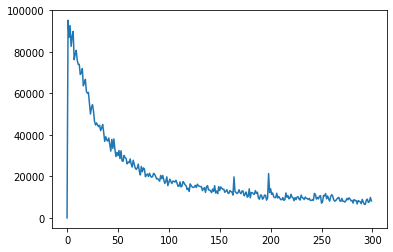

In [151]:
np_loss_list = []
loss_total_epoch = 0

#iterate through collected loss during training
for iterator, loss in enumerate(loss_list):
    
    #remove the computational graph of the torch tensor and transform torch to numpy tensor
    loss_total_epoch += loss.detach().numpy()
    
    #sum up the batch losses from each epoch
    if iterator%len(train_loader) == 0:
        np_loss_list.append(loss_total_epoch)
        loss_total_epoch =0 

#plot loss
plt.plot(np_loss_list)
plt.show()



In [197]:
with torch.no_grad():
    classes = ['BSD_11', 'BSD_21', 'BSD_31', 'BSD_P1']
    
    #collect information about labels, predictions
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(4)]
    n_class_samples = [0 for i in range(4)]
    n_class_samples_out = [0 for i in range(4)]
    
    #iterate through bateches in test_loader
    for window, labels in test_loader:
        #make predictions for each batch
        print(f"labels: {labels}")
        outputs = model(window.float())
        print(outputs)
        #for each element in batch check if prediction is correct and collect total and correct predictions and labels
        for i in range(batch_size):
            if len(labels)==4:
                label = labels[i]
                output = torch.argmax(outputs[i])
                print(f"argmax out: {output}")
                if label == output:
                    n_correct+=1
                    n_class_correct[label]+=1
                    print(f'{i}correct')
                
                n_samples+=1
                n_class_samples[label]+=1
                n_class_samples_out[output]+=1
            else:
                break
    
    #calculate total accuracy
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')
    
    #calculate class accuracy
    for i in range(4):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

labels: tensor([2, 1, 2, 3])
tensor([[ -641.0454,  3140.0796,  4272.8643, -6768.0332],
        [  -27.6719,   416.3887,  -600.3907,   215.2950],
        [ -242.3289,   594.4327,   572.5288,  -921.2480],
        [  225.5517,  -771.4608,  -432.4328,   979.2803]])
argmax out: 2
0correct
argmax out: 1
1correct
argmax out: 1
argmax out: 3
3correct
labels: tensor([2, 0, 3, 0])
tensor([[  -56.7267,   260.9501,  1742.9858, -1943.3401],
        [  808.2579,  -498.2379,  -937.7645,   629.2237],
        [   31.1063,   199.0655, -1251.3966,  1024.2822],
        [ 2214.7263,  -775.0059, -1752.7979,   313.7882]])
argmax out: 2
0correct
argmax out: 0
1correct
argmax out: 3
2correct
argmax out: 0
3correct
labels: tensor([3, 1, 3, 3])
tensor([[ -79.8841,  156.1156, -357.9826,  286.9725],
        [ -22.8737,  610.7881,  261.2741, -843.6342],
        [ -56.3988,   42.8587, -284.0754,  302.9667],
        [ -89.2518,  394.7990, -692.2767,  388.6483]])
argmax out: 3
0correct
argmax out: 1
1correct
argmax ou

tensor([[  912.8445,   104.2696,  -832.2355,  -180.4438],
        [ -362.2013,   724.0480,   125.4180,  -484.6555],
        [ 1068.5063,   700.8339, -1258.4369,  -509.4034],
        [ -241.6171,   567.4251,  -921.8184,   598.4452]])
argmax out: 0
0correct
argmax out: 1
1correct
argmax out: 0
2correct
argmax out: 3
3correct
labels: tensor([1, 3, 2, 1])
tensor([[ -530.2075,  1706.9431,  -159.6423, -1012.4838],
        [    7.5745,  -423.1631, -1273.3169,  1691.7072],
        [ -951.8186,  1903.3309,  2315.4768, -3265.4880],
        [ -114.6841,  2876.4006,   812.2487, -3571.6304]])
argmax out: 1
0correct
argmax out: 3
1correct
argmax out: 2
2correct
argmax out: 1
3correct
labels: tensor([2, 0, 1, 0])
tensor([[ -348.6103,  2956.0791,  3645.3533, -6249.7939],
        [  426.0378,   184.6531,  -727.0202,   120.1495],
        [  -54.2570,   349.2798,  -253.1583,   -37.3743],
        [  461.4566,    97.3050,  -707.6160,   153.0686]])
argmax out: 2
0correct
argmax out: 0
1correct
argmax out: 1

tensor([[  264.7055,  1176.3257,  -266.1067, -1170.2365],
        [-1706.8901,  2608.9199,  1649.9819, -2552.2817],
        [-1725.6960,  1071.9338,  -114.2169,   770.3801],
        [  578.0967,  -105.3959,    28.6137,  -497.2942]])
argmax out: 1
0correct
argmax out: 1
1correct
argmax out: 1
argmax out: 0
3correct
labels: tensor([2, 2, 1, 0])
tensor([[ -782.0535,    97.4313,   901.6715,  -212.9827],
        [-1001.9368,    47.5734,  1398.6458,  -442.3016],
        [  336.3195,  1261.7964,  -705.1199,  -888.2096],
        [  808.7646,  -239.8881,  -790.3754,   223.9138]])
argmax out: 2
0correct
argmax out: 2
1correct
argmax out: 1
2correct
argmax out: 0
3correct
labels: tensor([1, 1, 2, 2])
tensor([[-1693.7977,  1183.0365,   213.0139,   298.7075],
        [  287.1426,  1697.8501, -2086.0039,   105.5448],
        [ -509.1367,   456.7550,  1123.2936, -1069.7174],
        [ -340.9164,   439.9195,   494.3476,  -588.8518]])
argmax out: 1
0correct
argmax out: 1
1correct
argmax out: 2
2correct

In [147]:
print(n_class_samples_out)
print(n_class_samples)
print(n_class_correct)

[96, 117, 88, 83]
[107, 95, 103, 79]
[93, 92, 87, 75]
